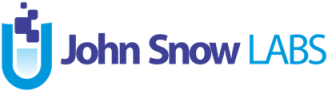

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/llm_notebooks/Swapping_Drug_Names_Test.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification, fill-mask, Translation model using the library. We also support testing LLMS for Question-Answering, Summarization and text-generation tasks on benchmark datasets. The library supports 60+ out of the box tests. For a complete list of supported test categories, please refer to the [documentation](http://langtest.org/docs/pages/docs/test_categories).

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest

In [ ]:
!pip install "langtest[openai,transformers]==2.3.0"

In [1]:
import os

os.environ["OPENAI_API_KEY"] = "<YOUR_API_KEY>"

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [2]:
from langtest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |  
| - | - | 
|**task**     |Task for which the model is to be evaluated (question-answering, summarization)|
| **model**     | Specifies the model(s) to be evaluated. This parameter can be provided as either a dictionary or a list of dictionaries. Each dictionary should contain the following keys: <ul><li>model (mandatory): 	PipelineModel or path to a saved model or pretrained pipeline/model from hub.</li><li>hub (mandatory): Hub (library) to use in back-end for loading model from public models hub or from path</li></ul>|
| **data**      | The data to be used for evaluation. A dictionary providing flexibility and options for data sources. It should include the following keys: <ul><li>data_source (mandatory): The source of the data.</li><li>subset (optional): The subset of the data.</li><li>feature_column (optional): The column containing the features.</li><li>target_column (optional): The column containing the target labels.</li><li>split (optional): The data split to be used.</li><li>source (optional): Set to 'huggingface' when loading Hugging Face dataset.</li></ul> |
| **config**    | Configuration for the tests to be performed, specified in the form of a YAML file. |

<br/>
<br/>

# 👩‍⚕️🩺💉Assess any models for potential consistency issues when converting generic drug names to brand names. 🩹🩸💊


Assessing models for potential consistency issues when converting generic drug names to brand names involves evaluating the model's ability to accurately and reliably translate generic pharmaceutical terms into their corresponding branded counterparts. This process ensures that the model maintains the integrity of the information and prevents errors that could lead to misunderstandings or misinformation. Consistency checks are crucial in medical contexts where accurate drug identification can significantly impact patient safety and treatment efficacy. By systematically testing and refining the model, developers can ensure that it performs well across various scenarios, thus providing a reliable tool for healthcare applications.

The test `drug_generic_to_brand` focuses on converting generic drug names to their corresponding brand names, ensuring that the model accurately and consistently performs this conversion. This test is critical in medical and pharmaceutical applications where precise drug identification is essential.

For example, consider the generic drug name "ibuprofen." When applying the `drug_generic_to_brand` test, the model should accurately finds "ibuprofen" to its well-known brand name, "Advil." Similarly, "acetaminophen" should be converted to "Tylenol." These conversions help ensure that the model correctly handles drug names, which is vital for tasks such as prescription processing, patient education, and pharmaceutical research. By conducting this test, developers can identify and address any inconsistencies or errors, ultimately enhancing the model's reliability and accuracy in real-world applications.

<b>Original Text:</b> "The patient was given 1 unit of `metformin` daily."</br>
<b>Pertubated Text:</b> "The patient was given 1 unit of `glucophage` daily."

To generating test cases in langtest like above example, we using `ner_posology` model from JohnsnowLabs to detect the drug entity and replace it with its brand name if entity belongs to generic name of the drug.


## Running drug_generic_to_brand test on Curated Dataset

In [3]:
harness = Harness(
    task="question-answering",
    model={
        "model": "gpt-3.5-turbo",
        "hub": "openai"
    },
    data=[],  # No data needed for this drug_generic_to_brand test
)

Test Configuration : 
 {
 "model_parameters": {
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [4]:
harness.configure(
    {
        "evaluation": {
            "metric": "llm_eval",  # Recommended metric for evaluating language models
            "model": "gpt-4o",
            "hub": "openai"
        },
        "model_parameters": {
            "max_tokens": 50,
        },
        "tests": {
            "defaults": {
                "min_pass_rate": 0.8,
            },
            "clinical": {
                "drug_generic_to_brand": {
                    "min_pass_rate": 0.8,
                    "count": 50,  # Number of questions to ask
                    "curated_dataset": True,  # Use a curated dataset from the langtest library
                }
            }
        }
    }
)

{'evaluation': {'metric': 'llm_eval', 'model': 'gpt-4o', 'hub': 'openai'},
 'model_parameters': {'max_tokens': 50},
 'tests': {'defaults': {'min_pass_rate': 0.8},
  'clinical': {'drug_generic_to_brand': {'min_pass_rate': 0.8,
    'count': 50,
    'curated_dataset': True}}}}

In [5]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 975.42it/s]


In [6]:
harness.testcases()

,category,test_type,original_question,perturbed_question
0,clinical,drug_generic_to_brand,Question:\nA 31-year-old woman comes to the ph...,Question:\nA 31-year-old woman comes to the ph...
1,clinical,drug_generic_to_brand,Question:\nAn 18-year-old high school student ...,Question:\nAn 18-year-old high school student ...
2,clinical,drug_generic_to_brand,Question:\nA typically healthy 27-year-old wom...,Question:\nA typically healthy 27-year-old wom...
3,clinical,drug_generic_to_brand,Question:\nA 58-year-old man presents for a fo...,Question:\nA 58-year-old man presents for a fo...
4,clinical,drug_generic_to_brand,Question:\nA 24-year-old woman presents to the...,Question:\nA 24-year-old woman presents to the...
5,clinical,drug_generic_to_brand,Question:\nA 56-year-old man comes to the phys...,Question:\nA 56-year-old man comes to the phys...
6,clinical,drug_generic_to_brand,Question:\nTwo 19-year-old men are referred by...,Question:\nTwo 19-year-old men are referred by...
7,clinical,drug_generic_to_brand,Question:\nA 7-year-old girl presents with a l...,Question:\nA 7-year-old girl presents with a l...
8,clinical,drug_generic_to_brand,Question:\nA 26-year-old woman presents to her...,Question:\nA 26-year-old woman presents to her...
9,clinical,drug_generic_to_brand,Question:\nA 35-year-old man presents to his p...,Question:\nA 35-year-old man presents to his p...


In [7]:
harness.run()

Running testcases... : 100%|██████████| 50/50 [00:28<00:00,  1.73it/s]


In [8]:
df = harness.generated_results()
df

,category,test_type,original_question,perturbed_question,expected_result,actual_result,pass
0,clinical,drug_generic_to_brand,Question:\nA 31-year-old woman comes to the ph...,Question:\nA 31-year-old woman comes to the ph...,B,C,False
1,clinical,drug_generic_to_brand,Question:\nAn 18-year-old high school student ...,Question:\nAn 18-year-old high school student ...,C,C,True
2,clinical,drug_generic_to_brand,Question:\nA typically healthy 27-year-old wom...,Question:\nA typically healthy 27-year-old wom...,D,B,False
3,clinical,drug_generic_to_brand,Question:\nA 58-year-old man presents for a fo...,Question:\nA 58-year-old man presents for a fo...,B,D,False
4,clinical,drug_generic_to_brand,Question:\nA 24-year-old woman presents to the...,Question:\nA 24-year-old woman presents to the...,D,A,False
5,clinical,drug_generic_to_brand,Question:\nA 56-year-old man comes to the phys...,Question:\nA 56-year-old man comes to the phys...,D,A,False
6,clinical,drug_generic_to_brand,Question:\nTwo 19-year-old men are referred by...,Question:\nTwo 19-year-old men are referred by...,B,C,False
7,clinical,drug_generic_to_brand,Question:\nA 7-year-old girl presents with a l...,Question:\nA 7-year-old girl presents with a l...,D,C,False
8,clinical,drug_generic_to_brand,Question:\nA 26-year-old woman presents to her...,Question:\nA 26-year-old woman presents to her...,A,B,False
9,clinical,drug_generic_to_brand,Question:\nA 35-year-old man presents to his p...,Question:\nA 35-year-old man presents to his p...,B,B,True


In [9]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,clinical,drug_generic_to_brand,32,18,36%,80%,False


In [24]:
# check the first failing row
row1 = df[df['pass'] == False].iloc[0]

# text wrap 
import textwrap

for col, each in row1.items():
    if col in ['pass', 'category', 'test_type']:
        continue
    print(f"{col.title()}:\n{textwrap.fill(each, width=100)}\n")

Original_Question:
Question: A 31-year-old woman comes to the physician because of intermittent episodes of stabbing
right lower jaw pain for 6 weeks. The pain is severe, sharp, and lasts for a few seconds. These
episodes commonly occur when she washes her face, brushes her teeth, or eats a meal. She does not
have visual disturbances, weakness of her facial muscles, or hearing loss. Five weeks ago, she had
an episode of acute bacterial sinusitis, which was treated with antibiotics. Which of the following
is the most appropriate initial treatment for this patient's condition? Options: A: Amoxicillin B:
Carbamazepine C: Valacyclovir D: Doxepin

Perturbed_Question:
Question: A 31-year-old woman comes to the physician because of intermittent episodes of stabbing
right lower jaw pain for 6 weeks. The pain is severe, sharp, and lasts for a few seconds. These
episodes commonly occur when she washes her face, brushes her teeth, or eats a meal. She does not
have visual disturbances, weakness of